In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
try:
  HeartDiseaseData=pd.read_csv('/content/heart_2020_cleaned.csv')
  print(f'Data shape:{HeartDiseaseData}')
except BaseException as err:
  print(f'Error when reading csv:{err}')


Data shape:       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0                No  16.60     Yes              No     No             3.0   
1                No  20.34      No              No    Yes             0.0   
2                No  26.58     Yes              No     No            20.0   
3                No  24.21      No              No     No             0.0   
4                No  23.71      No              No     No            28.0   
...             ...    ...     ...             ...    ...             ...   
319790          Yes  27.41     Yes              No     No             7.0   
319791           No  29.84     Yes              No     No             0.0   
319792           No  24.24      No              No     No             0.0   
319793           No  32.81      No              No     No             0.0   
319794           No  46.56      No              No     No             0.0   

        MentalHealth DiffWalking     Sex  AgeCategory      Race 

In [ ]:
print('head of data:\n{0}\ndtypes:\n\{1}\ninfo:{2}\nsum of nulls:\n{3} '
              .format(HeartDiseaseData.head(),HeartDiseaseData.dtypes,HeartDiseaseData.info(),HeartDiseaseData.isnull().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
HeartDiseaseDataf=pd.DataFrame(HeartDiseaseData).dropna()
#check again size of data
print('new data frame shape:{}'.format(HeartDiseaseDataf.shape))

for column in HeartDiseaseDataf:
  #get the unique values for every column
  uniq_val=np.unique(HeartDiseaseDataf[column])
  #count the unique values for every column
  np_val=len(uniq_val)
  if np_val <15:
    print('the number of values for feature {} : {} --:{}'.format(column,np_val,uniq_val))
  else:
    print('the number of values for feature {} : {}'.format(column,np_val))
#HeartDiseaseDataf.head()

new data frame shape:(319795, 18)
the number of values for feature HeartDisease : 2 --:['No' 'Yes']
the number of values for feature BMI : 3604
the number of values for feature Smoking : 2 --:['No' 'Yes']
the number of values for feature AlcoholDrinking : 2 --:['No' 'Yes']
the number of values for feature Stroke : 2 --:['No' 'Yes']
the number of values for feature PhysicalHealth : 31
the number of values for feature MentalHealth : 31
the number of values for feature DiffWalking : 2 --:['No' 'Yes']
the number of values for feature Sex : 2 --:['Female' 'Male']
the number of values for feature AgeCategory : 13 --:['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
the number of values for feature Race : 6 --:['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
the number of values for feature Diabetic : 4 --:['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
the number of values for feature

In [ ]:
#NADP is: number of alcohol heart disease persons
def AlchocolDrinking():
  NADP=0
  NADP_not=0
  for Disease,Alcohol in zip(HeartDiseaseDataf['HeartDisease'],HeartDiseaseDataf['AlcoholDrinking']):
    if Disease==Alcohol=='Yes':
      NADP+=1
    else:
      NADP_not+=1
  NADPPercentage=round(NADP/HeartDiseaseDataf.shape[0],6)*100
  print("Alcohol Drinkers percentage that have heart disease to the data:{}%".format(NADPPercentage))

  print("number of alcohol drinkers that has heart disease", NADP)

  print("number of alcohol drinkers that don't have heart disease", NADP_not)

AlchocolDrinking()

Alcohol Drinkers percentage that have heart disease to the data:0.3568%
number of alcohol drinkers that has heart disease 1141
number of alcohol drinkers that don't have heart disease 318654


In [ ]:
def smoking():
  smoking=0
  smoking_not=0
  for Disease,Smoke in zip(HeartDiseaseDataf['HeartDisease'],HeartDiseaseDataf['Smoking']):
    if Disease==Smoke=='Yes':
      smoking+=1
    elif Disease==Smoke=='No':
      smoking_not+=1

  print('number of smokers that have heart disease',smoking)
  print('number of smokers that don\'t have heart disease',smoking_not)
smoking()

number of smokers that have heart disease 16037
number of smokers that don't have heart disease 176551


In [ ]:
male=0
female=0
for gender in HeartDiseaseDataf['Sex']:
  if gender=='Male':
    male+=1
  elif gender=='Female':
    female+=1
print('number of males',male)
print('number of females',female)

def gender():
  male=0
  female=0
  for gender in HeartDiseaseDataf['Sex']:
    if gender=='Male':
      male+=1
    elif gender=='Female':
      female+=1

    print('number of males',male)
    print('number of females',female)

gender()

Streaming output truncated to the last 5000 lines.
number of males 150979
number of females 166317
number of males 150979
number of females 166318
number of males 150979
number of females 166319
number of males 150980
number of females 166319
number of males 150981
number of females 166319
number of males 150982
number of females 166319
number of males 150982
number of females 166320
number of males 150982
number of females 166321
number of males 150982
number of females 166322
number of males 150983
number of females 166322
number of males 150984
number of females 166322
number of males 150984
number of females 166323
number of males 150985
number of females 166323
number of males 150985
number of females 166324
number of males 150985
number of females 166325
number of males 150985
number of females 166326
number of males 150985
number of females 166327
number of males 150985
number of females 166328
number of males 150986
number of females 166328
number of males 150986
number of fema

In [ ]:
ageGroupsCount={}
for Disease,Age in zip(HeartDiseaseDataf['HeartDisease'],HeartDiseaseDataf['AgeCategory']):
  if Disease=='yes':
    ageGroupsCount[Age]=ageGroupsCount.get(Age,0)+1

  print('count of heart desease for every Agecategory:',sorted(ageGroupsCount.items()))


Streaming output truncated to the last 5000 lines.
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart desease for every Agecategory: []
count of heart des

In [ ]:
list=[i for i in HeartDiseaseDataf['PhysicalHealth']if i %2==0]
print(list)
print(len(list))

list=[i for i in HeartDiseaseDataf['PhysicalHealth']if i %2 !=0]
print(list)
print(len(list))

list=[i for i in HeartDiseaseDataf['SleepTime']if i  >=10]
print(list)
print(len(list))

[0.0, 20.0, 0.0, 28.0, 6.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 30.0, 0.0, 4.0, 30.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 6.0, 30.0, 0.0, 0.0, 0.0, 2.0, 2.0, 0.0, 14.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 30.0, 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 8.0, 30.0, 0.0, 0.0, 0.0, 30.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 30.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 16.0, 0.0, 0.0, 20.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 14.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 30.0, 0.0, 2.0, 2.0, 6.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 10.0, 14.0, 20.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 20.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [ ]:
list_y=[]
list_n=[]
for character in HeartDiseaseDataf['Smoking']:
  if character=='Yes':
    list_y.append(character)
  else:
    list_n.append(character)
print(len(list_y))
print(list_y)
print(len(list_n))
print(list_n)

131908
['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes'

In [ ]:
class HeartDisease:
  def __init__(self):
    self.kidney_Disease=0
    self.not_kidney_Disease=0
    self.skin_cancer=0
    self.not_skin_cancer=0

  def kidneyDisease(self):
    for HeartDisease,KidneyDisease in zip(HeartDiseaseDataf['HeartDisease'],HeartDiseaseDataf['KidneyDisease']):
      if HeartDisease==KidneyDisease=='Yes':
        self.kidney_Disease+=1
      else:
        self.not_kidney_Disease+=1

    print('number of persons with kidney disease',self.kidney_Disease)
    print('number of persons without kidney disease',self.not_kidney_Disease)


  def skincancer(self):
    for HeartDisease, SkinCancer in zip(HeartDiseaseDataf['HeartDisease'],HeartDiseaseDataf['SkinCancer']):
      if HeartDisease==SkinCancer=='Yes':
        self.skin_cancer+=1
      else:
        self.not_skin_cancer+=1

    print('number of persons with skin cancer',self.skin_cancer)
    print('number of persons without skin cancer',self.not_skin_cancer)


heart=HeartDisease()


In [ ]:
heart.kidneyDisease()

number of persons with kidney disease 3455
number of persons without kidney disease 316340


In [ ]:
heart.skincancer()

number of persons with skin cancer 4980
number of persons without skin cancer 314815


In [ ]:
HeartDiseaseDataf.head()

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1              Yes  Very good        7.0     No            No         No  
2              Yes       Fair        8.0    Yes            No         No  
3               No       Good        6.0     No            No        Yes  
4              Yes  Very good        8.0     No            No         No

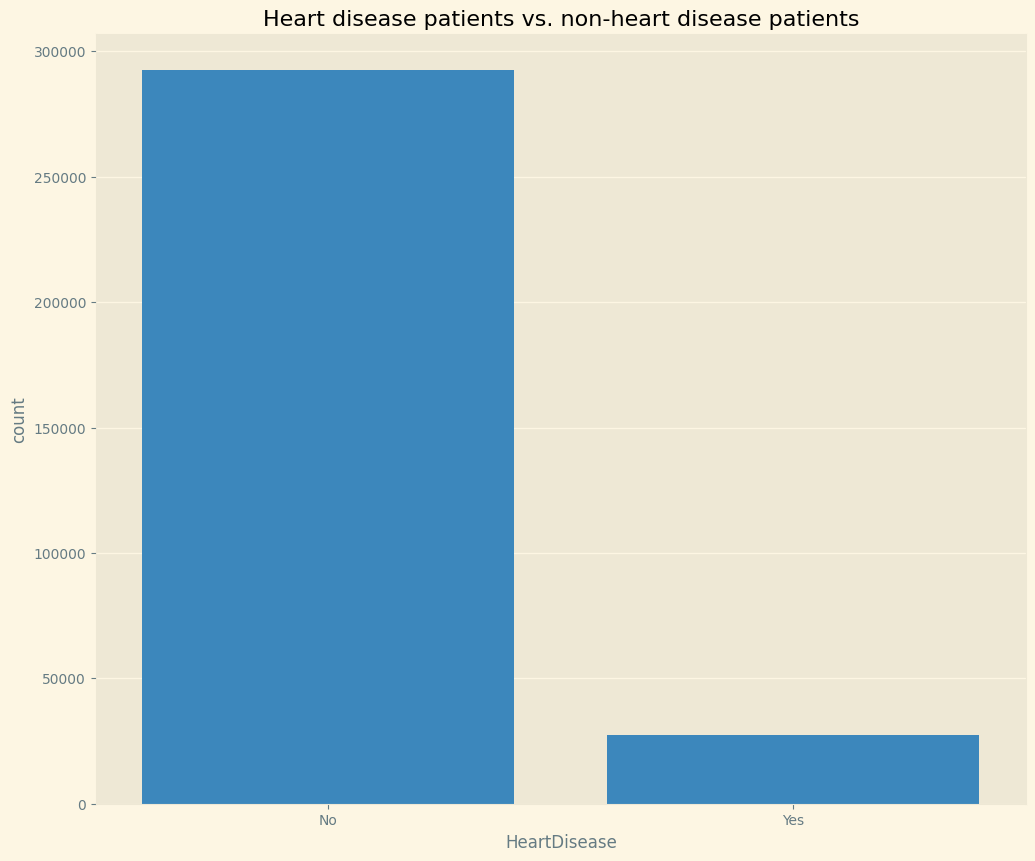

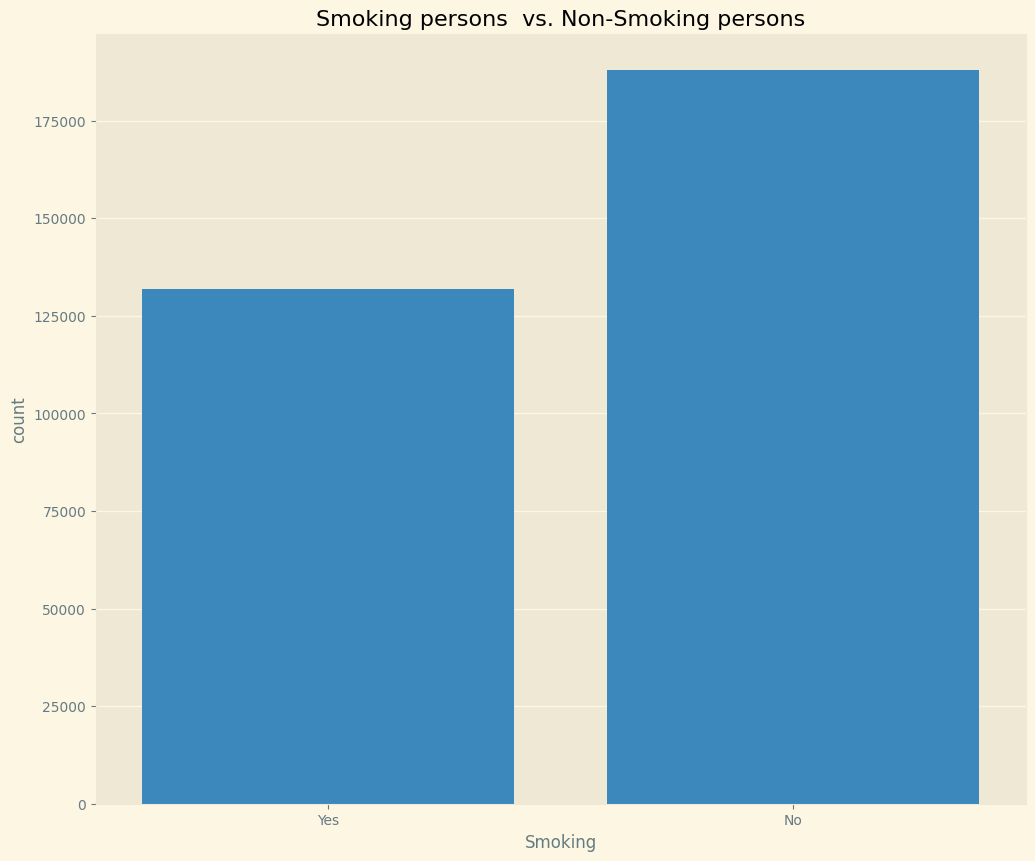

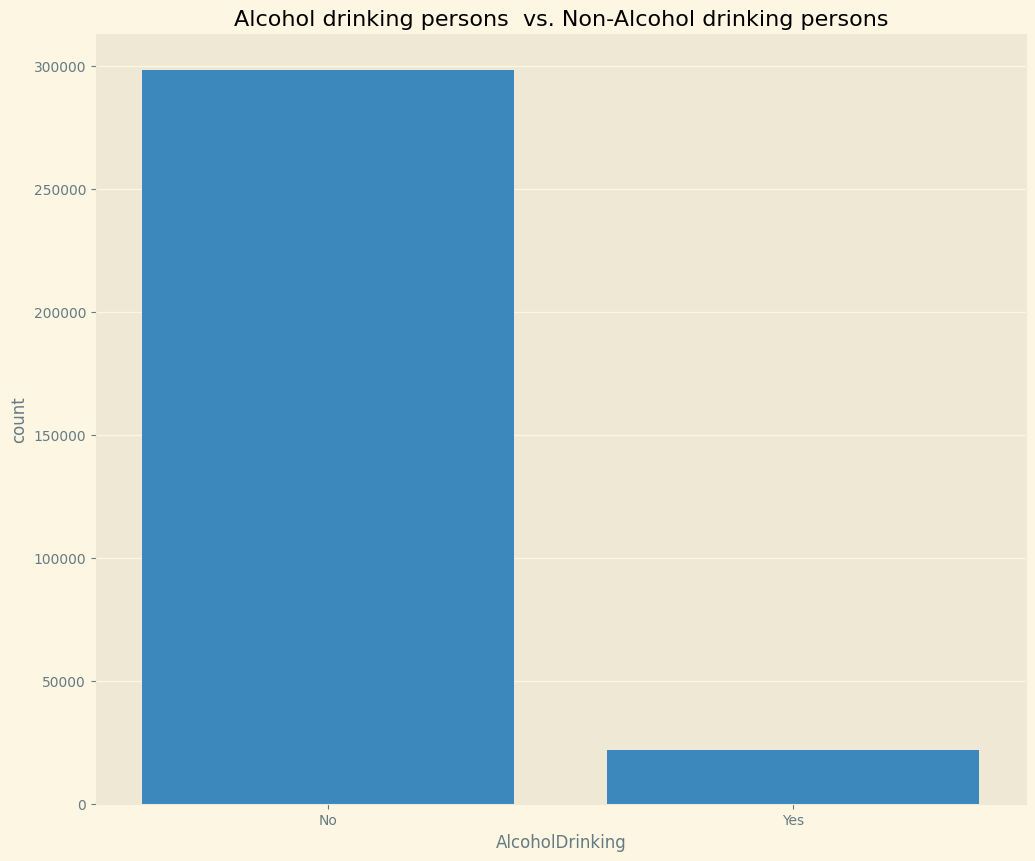

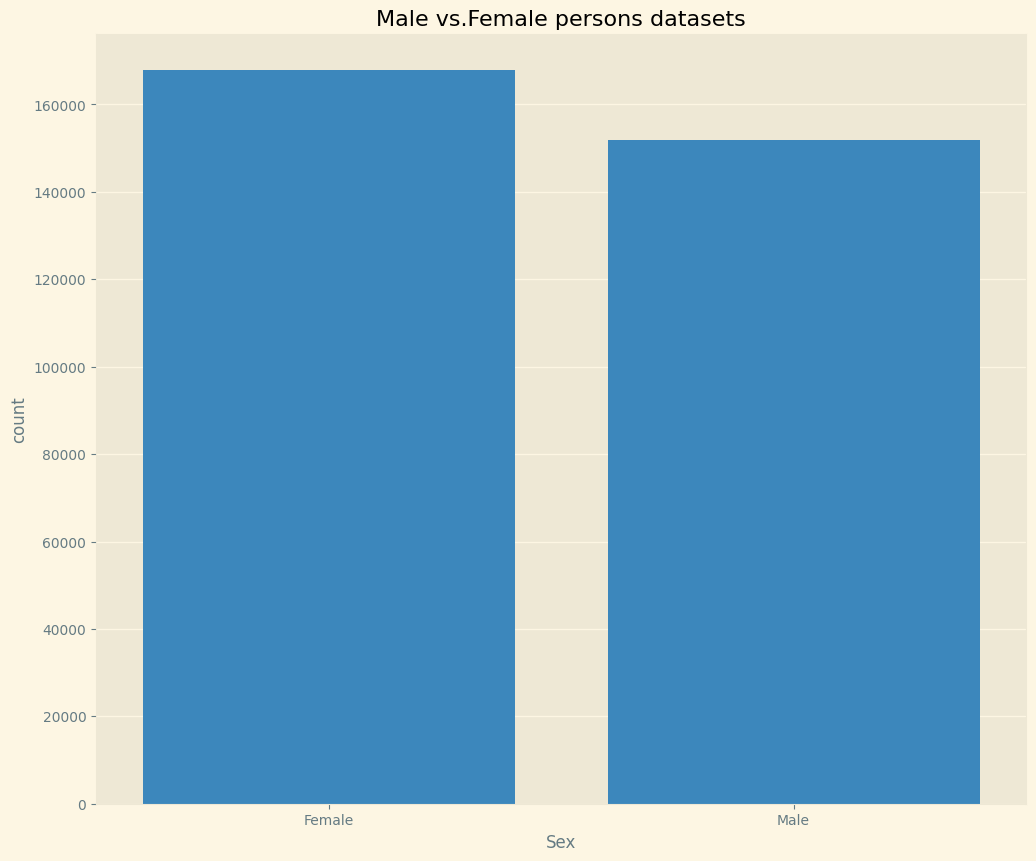

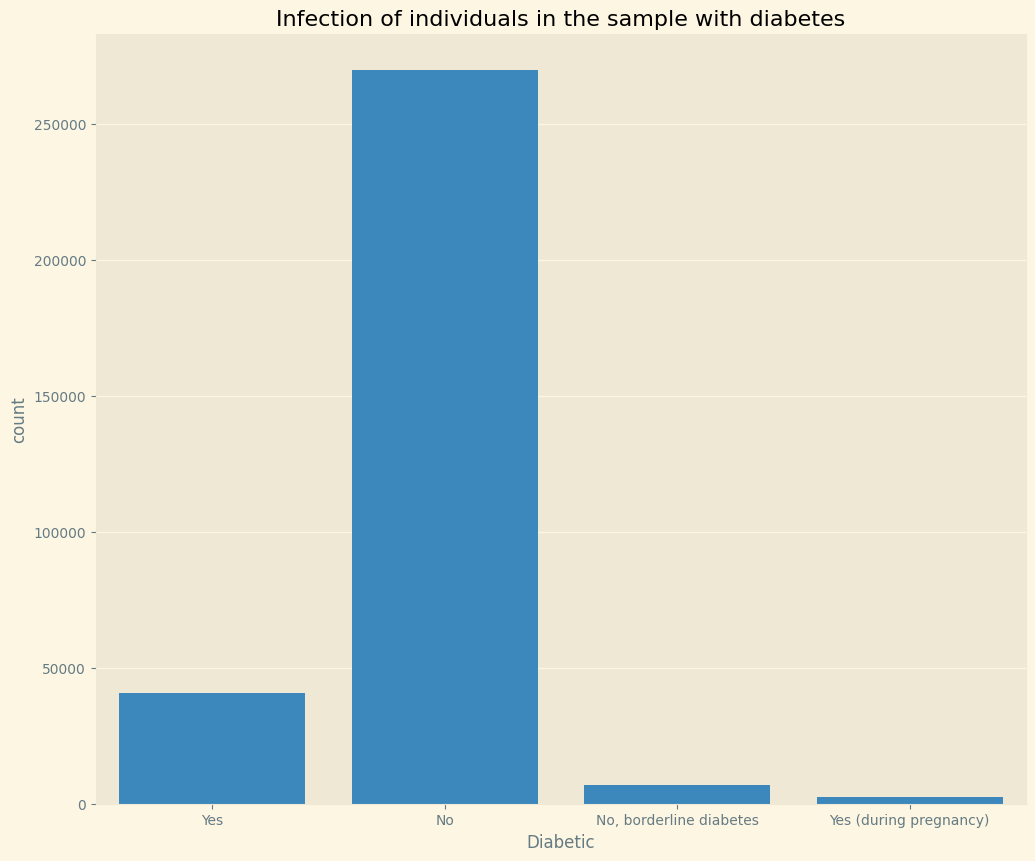

In [ ]:
def drawPlots():
  plt.style.use('Solarize_Light2')
  plt.figure(figsize=(12,10))
  plt.title('Heart disease patients vs. non-heart disease patients')
  sns.countplot(x='HeartDisease',data=HeartDiseaseDataf)
  plt.show()

  plt.figure(figsize=(12,10))
  plt.title('Smoking persons  vs. Non-Smoking persons')
  sns.countplot(x='Smoking',data=HeartDiseaseDataf)
  plt.show

  plt.figure(figsize=(12,10))
  plt.title('Alcohol drinking persons  vs. Non-Alcohol drinking persons')
  sns.countplot(x='AlcoholDrinking',data=HeartDiseaseDataf)
  plt.show

  plt.figure(figsize=(12,10))
  plt.title('Male vs.Female persons datasets')
  sns.countplot(x='Sex',data=HeartDiseaseDataf)
  plt.show

  plt.figure(figsize=(12,10))
  plt.title('Infection of individuals in the sample with diabetes')
  sns.countplot(x='Diabetic',data=HeartDiseaseDataf)
  plt.show()
drawPlots()